In [17]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
dataset_path = '/content/drive/MyDrive/dataset/'
dataset_dir  = os.listdir(dataset_path)

width  = 92 
height = 112

## Face dataset

Train Images:


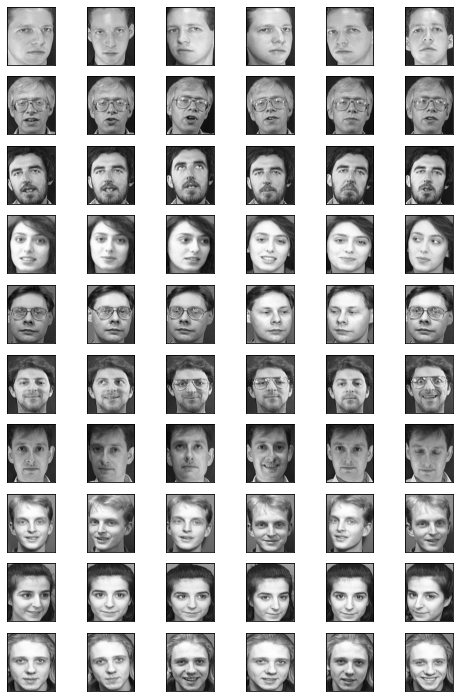

Test Images:


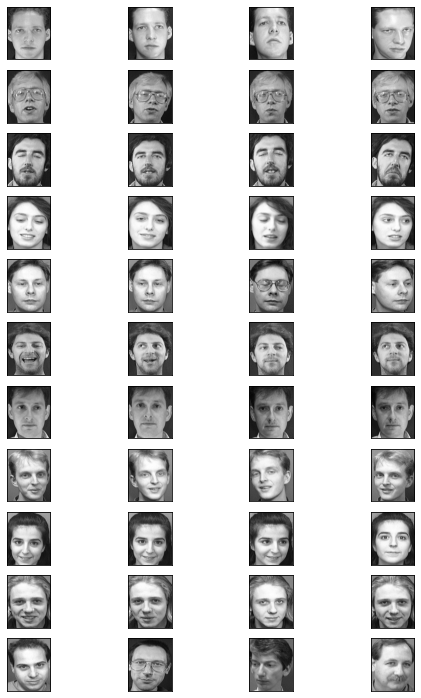

In [20]:
print('Train Images:')

# to store all the training images in an array
training_tensor   = np.ndarray(shape=(60, height*width), dtype=np.float64)

for i in range(60):
    img = plt.imread(dataset_path + 'training/'+str(i+1)+'.pgm')
    # copying images to the training array
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    # plotting the training images
    plt.subplot(10,6,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

print('Test Images:')
testing_tensor   = np.ndarray(shape=(44, height*width), dtype=np.float64)

for i in range(44):
    img = imread(dataset_path + 'test/'+str(i+1)+'.pgm')
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(11,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

## Mean Calculation

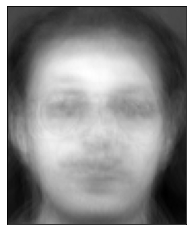

In [21]:
mean_face = np.zeros((1,height*width))

for i in pattern_matrix:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(pattern_matrix))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

## Do mean Zero

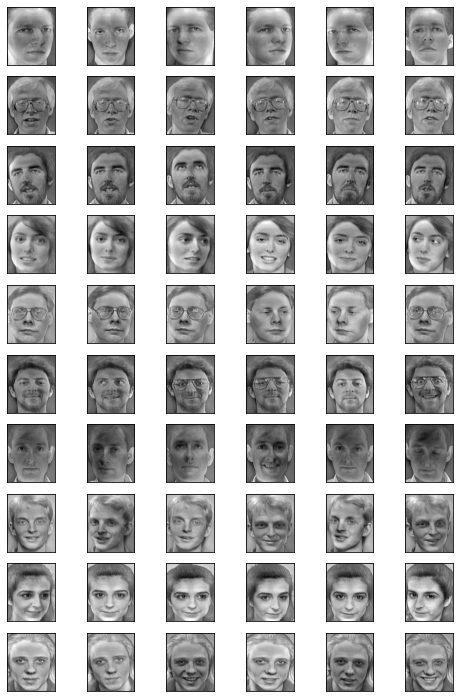

In [22]:
#normalized training set
normalised_training_tensor = np.ndarray(shape=(len(training_tensor), height*width))

for i in range(len(training_tensor)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

for i in range(len(training_tensor)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(10,6,1+i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

## Covariance Matrix

In [23]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,60.0)
'60 is the number of images'
print('Covariance matrix of X:')
print(cov_matrix)

Covariance matrix of X:
[[26.71176097  6.97861875  3.34364465 ... -0.88106057  0.3831036
  -4.91775239]
 [ 6.97861875 22.88781531  6.35103909 ...  1.71764062  4.25549617
   0.84787632]
 [ 3.34364465  6.35103909 34.31087586 ... -0.09787426  0.247893
   0.42981807]
 ...
 [-0.88106057  1.71764062 -0.09787426 ... 15.97353386  9.81907464
   7.59533209]
 [ 0.3831036   4.25549617  0.247893   ...  9.81907464 23.12518332
   9.6698415 ]
 [-4.91775239  0.84787632  0.42981807 ...  7.59533209  9.6698415
  17.07134601]]


## Eigenvalues and eigenvectors

In [24]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X):')
print(eigenvectors)
print('Eigenvalues of Cov(X):',eigenvalues)

Eigenvectors of Cov(X):
[[ 0.08584841  0.1504214  -0.0667439  ...  0.09115533  0.05840209
   0.00597986]
 [ 0.04806416  0.13864842 -0.10116728 ...  0.09956968  0.06109765
  -0.01828353]
 [ 0.28196699  0.05544493 -0.09761283 ... -0.19357923  0.00449109
   0.05329894]
 ...
 [ 0.00162568  0.06110127  0.14401746 ...  0.01786733 -0.07112438
  -0.1378246 ]
 [ 0.02746044  0.0962465   0.26253058 ... -0.27389105 -0.01632751
   0.3110689 ]
 [ 0.03158191 -0.00397991  0.19262434 ...  0.26310372  0.21661895
  -0.0440006 ]]
Eigenvalues of Cov(X): [195.94734509 184.70941617 128.52136564  94.31411563  75.79769151
  71.35069054  54.92605212  46.48739984  38.27637909  35.61992062
  28.58636227  24.7288088   23.10097208  21.92549362  18.35250559
  17.00566981  16.71875721  15.58434384  14.96384591  14.02102471
  12.94878163  12.37784154  11.50207743  11.19394028  10.65125831
  10.18486267   9.61603038   9.37410653   1.86626679   8.65448994
   2.45427304   8.33362795   7.90632044   7.72569785   7.65475405

## Feature vector --> choice of k

Cumulative proportion of variance explained vector: [0.14235022 0.27653641 0.36990356 0.4384201  0.49348499 0.54531925
 0.58522148 0.61899327 0.64679998 0.67267685 0.69344403 0.71140881
 0.72819102 0.74411927 0.75745185 0.76980599 0.7819517  0.79327328
 0.80414409 0.81432997 0.8237369  0.83272905 0.84108499 0.84921707
 0.85695491 0.86435392 0.8713397  0.87814972 0.88443697 0.89049111
 0.89623483 0.90184733 0.90740829 0.91278651 0.91809025 0.9231274
 0.92790612 0.93251957 0.93684152 0.94106178 0.94503355 0.94892965
 0.95275959 0.95651986 0.96013565 0.96364551 0.96702603 0.970232
 0.97333106 0.97640155 0.97937795 0.98222291 0.98502851 0.98763072
 0.9900445  0.99237438 0.99467928 0.99686125 0.99864421 1.        ]


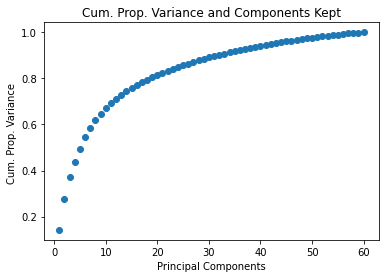

In [25]:
# get corresponding eigenvectors to eigen values
# so as to get the eigenvectors at the same corresponding index to eigen values when sorted
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Find cumulative variance of each principle component
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector:", var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance ')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [26]:
reduced_data = []

In [27]:
print('Number of eigen vectors:',len(eigvalues_sort))

# Choosing the necessary number of principle components
number_chosen_components = 30 #30// Remove hard coding
print("k:",number_chosen_components)
reduced_data = np.array(eigvectors_sort[:number_chosen_components]).transpose()

Number of eigen vectors: 60
k: 30


## Eigenfaces

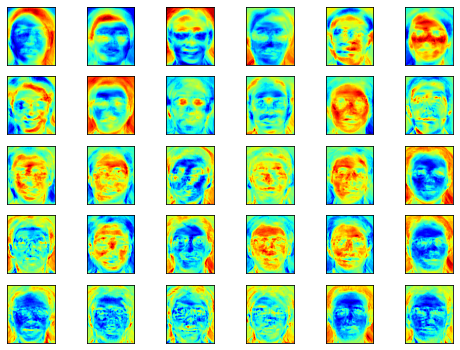

(30, 10304)

In [28]:
# get projected data ---> eigen space

proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

# plotting of eigen faces --> the information retained after applying lossing transformation
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(10,6,1+i)
    plt.imshow(img, cmap='jet')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

proj_data.shape

## Signature of Each Face

In [29]:
print(normalised_training_tensor.shape)
print(proj_data.shape)

w = np.array([np.dot(proj_data,img) for img in normalised_training_tensor])
w.shape

(60, 10304)
(30, 10304)


(60, 30)

## Testing

[1.92575809e+08 1.13036988e+08 1.54123249e+08 1.68651526e+08
 1.63254394e+08 1.20040285e+08 7.63519934e+07 8.19357218e+07
 8.81726009e+07 8.58412331e+07 7.93394107e+07 9.46093691e+07
 1.53410303e+08 1.22056976e+08 1.07504881e+08 1.59376207e+08
 1.51442510e+08 1.80177239e+08 4.99502184e+07 6.74574229e+07
 3.81491382e+07 8.08110540e+07 1.10541228e+08 5.99308866e+07
 6.63768764e+07 7.67469873e+07 6.63204414e+07 2.18947577e+07
 5.43864126e+07 5.24505269e+07 9.01681446e+07 6.06400717e+07
 7.54051958e+07 6.21343129e+07 9.38177854e+07 4.96280916e+07
 1.44276782e+08 2.15307199e+08 1.89442647e+08 1.82767221e+08
 1.47091823e+08 1.52959799e+08 3.53504785e+07 8.27741852e+07
 6.18227680e+07 4.05022880e+07 4.74125629e+07 4.06693228e+07
 1.62131357e+08 7.13100935e+07 1.08107304e+08 1.53727779e+08
 1.33148428e+08 1.25295345e+08 9.58082899e+07 6.36658625e+07
 7.05293274e+07 9.62176566e+07 7.16196210e+07 3.99390687e+07]


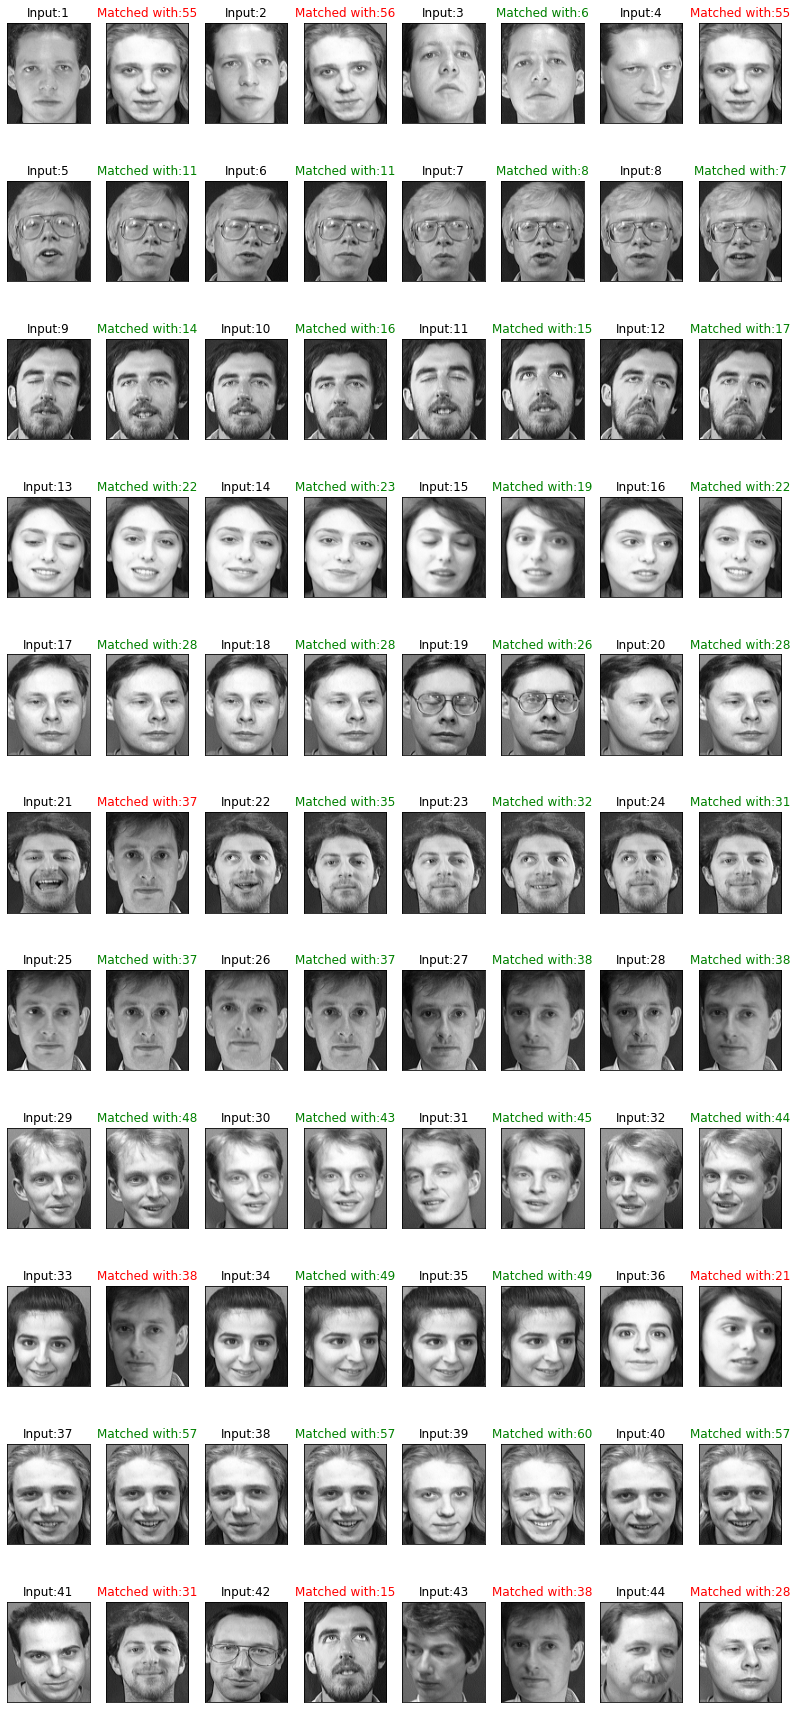

Correct predictions: 34/44 = 77.27272727272727%


In [30]:
# Testing all the images

count=0
num_images=0
correct_pred=0
def recogniser(img_number,proj_data,w):
    global count,highest_min,num_images,correct_pred,norms
    
    num_images          += 1
    unknown_face_vector = testing_tensor[img_number,:]
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(11,8,1+count)
    plt.imshow(unknown_face_vector.reshape(height,width), cmap='gray')
    plt.title('Input:'+str(img_number+1))
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector) # w_known --> projected test face
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    # print('norms::', norms[0])
    
    index = np.argmin(norms)
    
    # print('index::', index)
    # print('min::', np.min(norms))
    
    plt.subplot(11,8,1+count)
    
    set_number = int(img_number/4) #???
    # print('set what', set_number)
#     print(set_number)

    t0 = 15000000
    
#     if(img_number>=40):
#         print(norms[index])
    
    # if norms[index] < t0:
    # 1st Subject > 0 and < 6
    # 2nd Subject > 6 and 12
    if(index>=(6*set_number) and index<(6*(set_number+1))):
        plt.title('Matched with:'+str(index+1), color='g')
        plt.imshow(training_tensor[index,:].reshape(height,width), cmap='gray')
        correct_pred += 1
    else:
        plt.title('Matched with:'+str(index+1), color='r')
        plt.imshow(training_tensor[index,:].reshape(height,width), cmap='gray')
    # else:
    #     if(img_number>=40):
    #         plt.title('Unknown face!', color='g')
    #         correct_pred += 1
    #     else:
    #         plt.title('Unknown face!', color='r')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    count+=1

fig = plt.figure(figsize=(10, 10))
for i in range(len(testing_tensor)):
    recogniser(i,proj_data,w)
print(norms)
plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

## Plotting of Accuracy vs k-value for eigenvectors

In [31]:
accuracy = np.zeros(len(eigvalues_sort))

def tester(img_number,proj_data,w,num_images,correct_pred):
    
    num_images          += 1
    unknown_face_vector = testing_tensor[img_number,:]
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    set_number = int(img_number/4)

    t0 = 15000000
    
    # if norms[index] < t0:
    if(index>=(6*set_number) and index<(6*(set_number+1))):
          correct_pred += 1
    # else:
    #     if(img_number>=40):
    #         correct_pred += 1
    
    return num_images,correct_pred

def calculate(k):
    
#     print("k:",k)
    reduced_data = np.array(eigvectors_sort[:k]).transpose()
    
    proj_data = np.dot(training_tensor.transpose(),reduced_data)
    proj_data = proj_data.transpose()
    
    w = np.array([np.dot(proj_data,img) for img in normalised_training_tensor])
    
    num_images=0
    correct_pred=0
    
    for i in range(len(testing_tensor)):
        num_images,correct_pred = tester(i,proj_data,w,num_images,correct_pred)
    
    accuracy[k] = correct_pred/num_images*100.00
    
print('Total Number of eigenvectors:',len(eigvalues_sort))
for i in range(1,len(eigvalues_sort)):
    calculate(i)
    
fig, axi = plt.subplots()  
axi.plot(np.arange(len(eigvalues_sort)), accuracy, 'b')  
axi.set_xlabel('Number of eigen values')  
axi.set_ylabel('Accuracy')  
axi.set_title('Accuracy vs. k-value') 

IndentationError: ignored